In [119]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt



### Read data

In [120]:
df = pd.read_csv("all_coins_data.csv")
df.sort_values(["coin", "time"], inplace = True)
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversion_type,conversion_symbol,coin,daily_return_pct,intraday_return,daily_log_return
0,2020-08-22,0.1262,0.1183,0.1229,84207229.64,10373929.94,0.1253,direct,NaN,ADA,0.019528,0.019528,0.019340
1,2020-08-23,0.1259,0.1195,0.1253,64772529.12,7945897.18,0.1215,direct,NaN,ADA,-0.030327,-0.030327,-0.030797
2,2020-08-24,0.1270,0.1201,0.1215,77809944.45,9662533.63,0.1237,direct,NaN,ADA,0.018107,0.018107,0.017945
3,2020-08-25,0.1238,0.1063,0.1237,65939158.71,7699604.99,0.1126,direct,NaN,ADA,-0.089733,-0.089733,-0.094018
4,2020-08-26,0.1183,0.1107,0.1126,21686624.36,2483949.36,0.1144,direct,NaN,ADA,0.015986,0.015986,0.015859


### Generate Dataset

In [121]:
def generate_ts(df, tsfield, value):
    initstr = ""
    for val in df[tsfield].drop_duplicates():
        initstr += "df[df['{}']=='{}']['{}'].tolist(),".format(str(tsfield),str(val), str(value))
    return(initstr)


In [122]:
dfts = to_time_series_dataset([eval(generate_ts(df=df, tsfield="coin", value="close"))])

In [123]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(dfts)

### Clustering

In [124]:
n_clusters = range(3,11)

3  Clusters labels 1 [0]


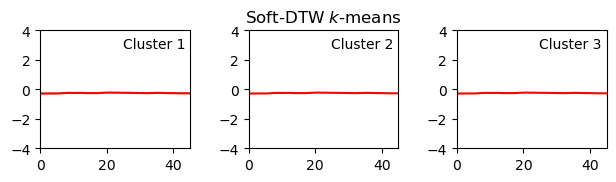

4  Clusters labels 1 [0]


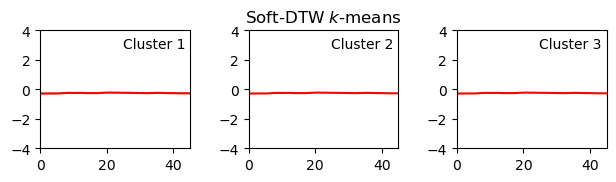

5  Clusters labels 1 [0]


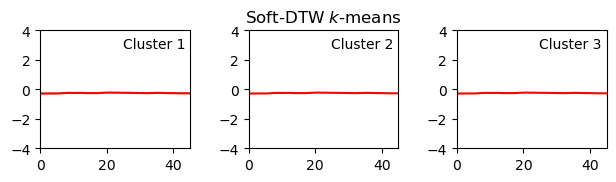

6  Clusters labels 1 [0]


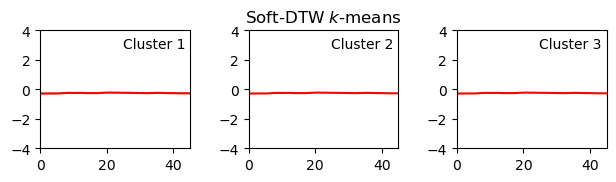

7  Clusters labels 1 [0]


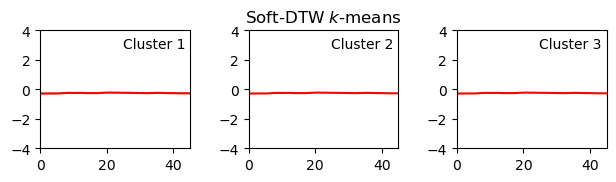

8  Clusters labels 1 [0]


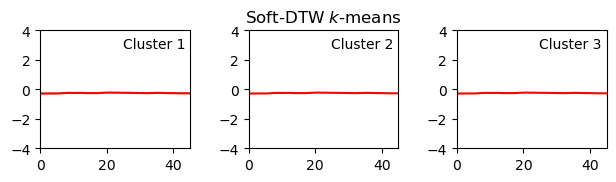

9  Clusters labels 1 [0]


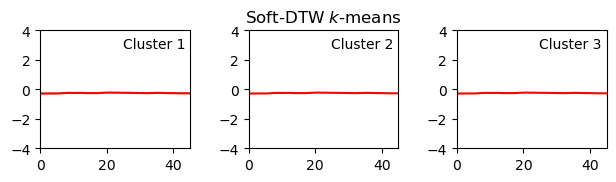

10  Clusters labels 1 [0]


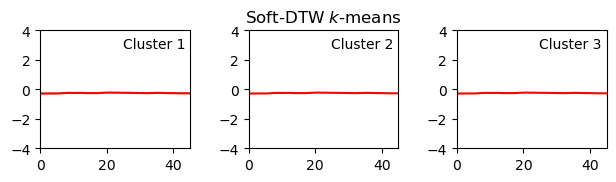

In [127]:
for c in n_clusters:
    km = TimeSeriesKMeans(n_clusters=c,
                           metric="softdtw",
                           metric_params={"gamma": .01})
    labels = km.fit_predict(X_train)
    print(c, " Clusters", "labels", len(labels), labels)
    y_pred = km.fit_predict(X_train)
    for yi in range(3):
        plt.subplot(3, 3, 7 + yi)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, X_train.shape[1])
        plt.ylim(-4, 4)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Soft-DTW $k$-means")

    plt.tight_layout()
    plt.show()